# Import 

# PEP 8

In [11]:
#%load_ext pycodestyle_magic
#%pycodestyle_on

## Librairies

In [12]:
%pylab inline
import pandas as pd
import os
import seaborn as sns
import plotly.express as px
sns.set_context("talk")

Populating the interactive namespace from numpy and matplotlib


/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Données

In [13]:
cdir = 'P5/'
files = os.listdir('P5')

customers = pd.read_csv(cdir + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(cdir + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(cdir + 'olist_order_items_dataset.csv')
order_payements = pd.read_csv(cdir + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(cdir + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(cdir + 'olist_orders_dataset.csv')
products = pd.read_csv(cdir + 'olist_products_dataset.csv')
sellers = pd.read_csv(cdir + 'olist_sellers_dataset.csv')
cat_name = pd.read_csv(cdir + 'product_category_name_translation.csv')

In [14]:
temp1 = pd.merge(customers, orders, on='customer_id')
temp2 = pd.merge(temp1, order_items, on='order_id')
temp3 = pd.merge(temp2, order_payements, on='order_id')
temp4 = pd.merge(temp3, order_reviews, on='order_id')
temp5 = pd.merge(temp4, products, on='product_id')
temp6 = pd.merge(temp5, sellers, on='seller_id')
temp7 = pd.merge(temp6, cat_name, on='product_category_name')
df = pd.merge(temp7, geolocation, left_on='customer_zip_code_prefix', 
              right_on='geolocation_zip_code_prefix')

# Exploration and cleaning

In [15]:
# Affichage complet du dataset

pd.pandas.set_option('display.max_columns', None)
df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
2  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
3  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
4  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

   customer_zip_code_prefix customer_city customer_state  \
0                     14409        franca             SP   
1                     14409        franca             SP   
2                     14409        franca             SP   
3                     14409        franca             SP   
4                     14409        franca             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
2  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
3  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
4  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2017-05-16 15:22:12          2017-05-23 10:47:57   
2  2017-05-16 15:22:12          2017-05-23 10:47:57   
3  2017-05-16 15:22:12          2017-05-23 10:47:57   
4  2017-05-16 15:22:12          2017-05-23 10:47:57   

  order_delivered_customer_date order_estimated_delivery_date  order_item_id  \
0           2017-05-25 10:35:35           2017-06-05 00:00:00              1   
1           2017-05-25 10:35:35           2017-06-05 00:00:00              1   
2           2017-05-25 10:35:35           2017-06-05 00:00:00              1   
3           2017-05-25 10:35:35           2017-06-05 00:00:00              1   
4           2017-05-25 10:35:35           2017-06-05 00:00:00              1   

                         product_id                         seller_id  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
2  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
3  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
4  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-05-22 15:22:12  124.99          21.88                   1   
1  2017-05-22 15:22:12  124.99          21.88                   1   
2  2017-05-22 15:22:12  124.99          21.88                   1   
3  2017-05-22 15:22:12  124.99          21.88                   1   
4  2017-05-22 15:22:12  124.99          21.88                   1   

  payment_type  payment_installments  payment_value  \
0  credit_card                     2         146.87   
1  credit_card                     2         146.87   
2  credit_card                     2         146.87   
3  credit_card                     2         146.87   
4  credit_card                     2         146.87   

                          review_id  review_score review_comment_title  \
0  88b8b52d46df026a9d1ad2136a59b30b             4                  NaN   
1  88b8b52d46df026a9d1ad2136a59b30b             4                  NaN   
2  88b8b52d46df026a9d1ad2136a59b30b             4                  NaN   
3  88b8b52d46df026a9d1ad2136a59b30b             4                  NaN   
4  88b8b52d46df026a9d1ad2136a59b30b             4                  NaN   

  review_comment_message review_creation_date review_answer_timestamp  \
0                    NaN  2017-05-26 00:00:00     2017-05-30 22:34:40   
1                    NaN  2017-05-26 00:00:00     2017-05-30 22:34:40   
2                    NaN  2017-05-26 00:00:00     2017-05-30 22:34:40   
3                    NaN  2

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17799100 entries, 0 to 17799099
Data columns (total 45 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   customer_id                    object 
 1   customer_unique_id             object 
 2   customer_zip_code_prefix       int64  
 3   customer_city                  object 
 4   customer_state                 object 
 5   order_id                       object 
 6   order_status                   object 
 7   order_purchase_timestamp       object 
 8   order_approved_at              object 
 9   order_delivered_carrier_date   object 
 10  order_delivered_customer_date  object 
 11  order_estimated_delivery_date  object 
 12  order_item_id                  int64  
 13  product_id                     object 
 14  seller_id                      object 
 15  shipping_limit_date            object 
 16  price                          float64
 17  freight_value                  float64
 18  

In [17]:
df.describe()

customer_zip_code_prefix  order_item_id         price  freight_value  \
count              1.779910e+07   1.779910e+07  1.779910e+07   1.779910e+07   
mean               3.271238e+04   1.206053e+00  1.216239e+02   1.964450e+01   
std                2.695850e+04   7.014987e-01  1.863875e+02   1.499869e+01   
min                1.003000e+03   1.000000e+00  8.500000e-01   0.000000e+00   
25%                1.314000e+04   1.000000e+00  3.990000e+01   1.347000e+01   
50%                2.390000e+04   1.000000e+00  7.499000e+01   1.628000e+01   
75%                3.840000e+04   1.000000e+00  1.350000e+02   2.043000e+01   
max                9.998000e+04   2.100000e+01  6.735000e+03   4.096800e+02   

       payment_sequential  payment_installments  payment_value  review_score  \
count        1.779910e+07          1.779910e+07   1.779910e+07  1.779910e+07   
mean         1.090367e+00          2.942556e+00   1.747545e+02  4.016673e+00   
std          6.713075e-01          2.804379e+00   2.672049e+02  1.408987e+00   
min          1.000000e+00          0.000000e+00   0.000000e+00  1.000000e+00   
25%          1.000000e+00          1.000000e+00   6.177000e+01  4.000000e+00   
50%          1.000000e+00          1.000000e+00   1.100000e+02  5.000000e+00   
75%          1.000000e+00          4.000000e+00   1.923000e+02  5.000000e+00   
max          2.900000e+01          2.400000e+01   1.366408e+04  5.000000e+00   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         1.779910e+07                1.779910e+07        1.779910e+07   
mean          4.865454e+01                7.789170e+02        2.191588e+00   
std           1.007301e+01                6.467112e+02        1.716134e+00   
min           5.000000e+00                4.000000e+00        1.000000e+00   
25%           4.200000e+01                3.410000e+02        1.000000e+00   
50%           5.100000e+01                5.950000e+02        1.000000e+00   
75%           5.700000e+01                9.750000e+02        3.000000e+00   
max           7.600000e+01                3.992000e+03        2.000000e+01   

       product_weight_g  product_length_cm  product_height_cm  \
count      1.779899e+07       1.779899e+07       1.779899e+07   
mean       2.154324e+03       3.053374e+01       1.672574e+01   
std        3.842001e+03       1.646455e+01       1.351252e+01   
min        0.000000e+00       7.000000e+00       2.000000e+00   
25%        3.000000e+02       1.800000e+01       8.000000e+00   
50%        7.000000e+02       2.500000e+01       1.300000e+01   
75%        1.825000e+03       3.900000e+01       2.000000e+01   
max        4.042500e+04       1.050000e+02       1.050000e+02   

       product_width_cm  seller_zip_code_prefix  geolocation_zip_code_prefix  \
count      1.779899e+07            1.779910e+07                 1.779910e+07   
mean       2.318440e+01            2.517934e+04                 3.271238e+04   
std        1.179185e+01            2.807223e+04                 2.695850e+04   
min        6.000000e+00            1.001000e+03                 1.003000e+03   
25%        1.500000e+01            6.807000e+03                 1.314000e+04   
50%        2.000000e+01            1.393000e+04                 2.390000e+04   
75%        3.000000e+01            3.031500e+04                 3.840000e+04   
max        1.180000e+02            9.973000e+04                 9.998000e+04   

       geolocation_lat  geolocation_lng  
count     1.779910e+07     1.779910e+07  
mean     -2.196825e+01    -4.594258e+01  
std       4.277211e+00     3.557446e+00  
min      -3.660537e+01    -1.014668e+02  
25%      -2.357595e+01    -4.761291e+01  
50%      -2.291064e+01    -4.645677e+01  
75%      -2.043997e+01    -4.335117e+01  
max       4.506593e+01     1.382021e+01

In [18]:
# Nombre d'occurences des variables liées aux paiements

payment_var = ['payment_sequential', 'payment_type', 'payment_installments']

for var in payment_var:
    print(var)
    print(df[var].value_counts()/len(df))
    print('\n')

payment_sequential
1     0.957388
2     0.027730
3     0.006022
4     0.002903
5     0.001658
6     0.001241
7     0.000734
8     0.000480
9     0.000413
10    0.000299
11    0.000273
12    0.000224
13    0.000108
14    0.000101
15    0.000069
16    0.000059
17    0.000059
18    0.000059
19    0.000059
20    0.000032
21    0.000032
22    0.000010
23    0.000008
24    0.000008
25    0.000008
26    0.000008
27    0.000005
28    0.000005
29    0.000005
Name: payment_sequential, dtype: float64


payment_type
credit_card    0.739654
boleto         0.193326
voucher        0.052747
debit_card     0.014272
Name: payment_type, dtype: float64


payment_installments
1     0.502789
2     0.113281
3     0.099537
4     0.066303
10    0.059137
5     0.051979
8     0.042267
6     0.039197
7     0.015209
9     0.006329
12    0.001397
15    0.000737
24    0.000528
18    0.000310
20    0.000246
13    0.000224
11    0.000215
14    0.000114
21    0.000075
17    0.000070
16    0.000029
0     0.000015
22    

## customer_id vs customer_unique_id

In [19]:
len(df['customer_id'].unique())

96987

In [20]:
len(df['customer_unique_id'].unique())

93829

# Features

## Creation

### Delivery time

In [21]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['delivery_time'] = df['delivery_time'].dt.days

### Distance seller/buyer

In [22]:
# Est-ce que le client et l'acheteur sont dans le même état

df['same_state'] = df['geolocation_state'] == df['seller_state']

### Volume

In [23]:
df['volume'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

## Subset selection

In [24]:
sel = df[['customer_unique_id', 'customer_city', 'customer_state', 'order_id',
          'order_purchase_timestamp', 'order_status','product_id', 'seller_id', 'price',
          'freight_value', 'review_score', 'product_category_name_english',
          'geolocation_lat', 'geolocation_lng',  'payment_type', 'payment_installments',
          'volume', 'product_weight_g', 'delivery_time', 'same_state']]

In [25]:
sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17799100 entries, 0 to 17799099
Data columns (total 20 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   customer_unique_id             object        
 1   customer_city                  object        
 2   customer_state                 object        
 3   order_id                       object        
 4   order_purchase_timestamp       datetime64[ns]
 5   order_status                   object        
 6   product_id                     object        
 7   seller_id                      object        
 8   price                          float64       
 9   freight_value                  float64       
 10  review_score                   int64         
 11  product_category_name_english  object        
 12  geolocation_lat                float64       
 13  geolocation_lng                float64       
 14  payment_type                   object        
 15  payment_insta

In [26]:
sel.head()

customer_unique_id customer_city customer_state  \
0  861eff4711a542e4b93843c6dd7febb0        franca             SP   
1  861eff4711a542e4b93843c6dd7febb0        franca             SP   
2  861eff4711a542e4b93843c6dd7febb0        franca             SP   
3  861eff4711a542e4b93843c6dd7febb0        franca             SP   
4  861eff4711a542e4b93843c6dd7febb0        franca             SP   

                           order_id order_purchase_timestamp order_status  \
0  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35    delivered   
1  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35    delivered   
2  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35    delivered   
3  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35    delivered   
4  00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35    delivered   

                         product_id                         seller_id   price  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab  124.99   
1  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab  124.99   
2  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab  124.99   
3  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab  124.99   
4  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab  124.99   

   freight_value  review_score product_category_name_english  geolocation_lat  \
0          21.88             4              office_furniture       -20.509897   
1          21.88             4              office_furniture       -20.497396   
2          21.88             4              office_furniture       -20.510459   
3          21.88             4              office_furniture       -20.480940   
4          21.88             4              office_furniture       -20.515413   

   geolocation_lng payment_type  payment_installments    volume  \
0       -47.397866  credit_card                     2  107136.0   
1       -47.399241  credit_card                     2  107136.0   
2       -47.399553  credit_card                     2  107136.0   
3       -47.394161  credit_card                     2  107136.0   
4       -47.398194  credit_card                     2  107136.0   

   product_weight_g  delivery_time  same_state  
0            8683.0            8.0        True  
1            8683.0            8.0        True  
2            8683.0            8.0        True  
3            8683.0            8.0        True  
4            8683.0            8.0        True

In [27]:
sel.describe()

price  freight_value  review_score  geolocation_lat  \
count  1.779910e+07   1.779910e+07  1.779910e+07     1.779910e+07   
mean   1.216239e+02   1.964450e+01  4.016673e+00    -2.196825e+01   
std    1.863875e+02   1.499869e+01  1.408987e+00     4.277211e+00   
min    8.500000e-01   0.000000e+00  1.000000e+00    -3.660537e+01   
25%    3.990000e+01   1.347000e+01  4.000000e+00    -2.357595e+01   
50%    7.499000e+01   1.628000e+01  5.000000e+00    -2.291064e+01   
75%    1.350000e+02   2.043000e+01  5.000000e+00    -2.043997e+01   
max    6.735000e+03   4.096800e+02  5.000000e+00     4.506593e+01   

       geolocation_lng  payment_installments        volume  product_weight_g  \
count     1.779910e+07          1.779910e+07  1.779899e+07      1.779899e+07   
mean     -4.594258e+01          2.942556e+00  1.553146e+04      2.154324e+03   
std       3.557446e+00          2.804379e+00  2.367161e+04      3.842001e+03   
min      -1.014668e+02          0.000000e+00  1.680000e+02      0.000000e+00   
25%      -4.761291e+01          1.000000e+00  2.898000e+03      3.000000e+02   
50%      -4.645677e+01          1.000000e+00  6.760000e+03      7.000000e+02   
75%      -4.335117e+01          4.000000e+00  1.875000e+04      1.825000e+03   
max       1.382021e+01          2.400000e+01  2.962080e+05      4.042500e+04   

       delivery_time  
count   1.743683e+07  
mean    1.177674e+01  
std     9.121210e+00  
min     0.000000e+00  
25%     6.000000e+00  
50%     1.000000e+01  
75%     1.500000e+01  
max     2.090000e+02

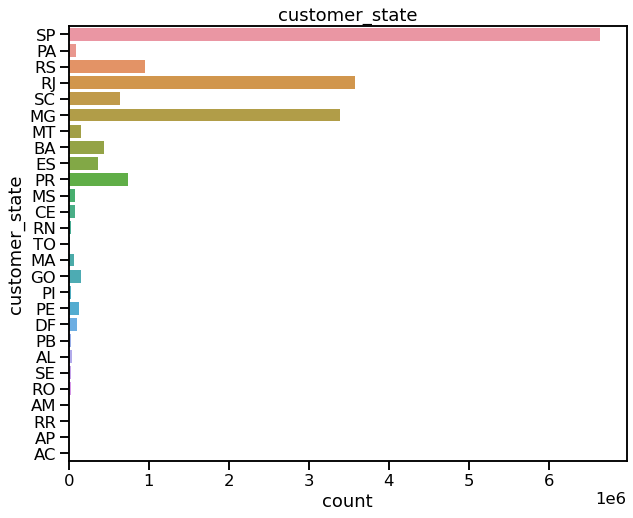

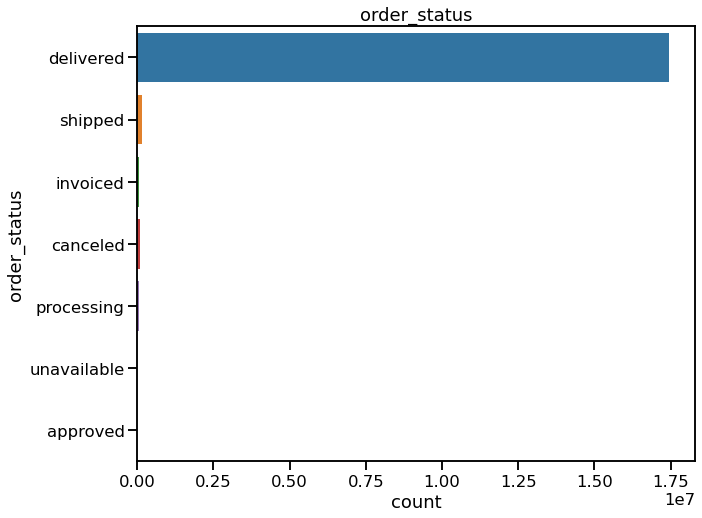

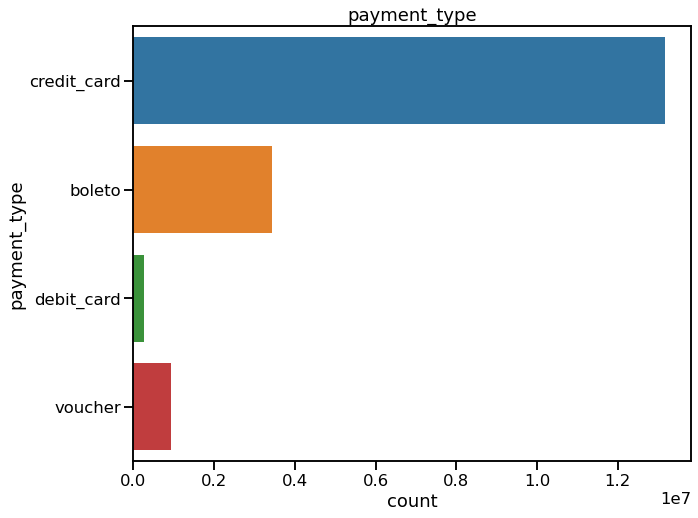

In [28]:
# Exploration de quelques variables catégorielles

cat_sel = list(sel.select_dtypes(['object']).columns)

cat_sel.remove('customer_unique_id')
cat_sel.remove('order_id')
cat_sel.remove('product_id')
cat_sel.remove('seller_id')
cat_sel.remove('customer_city')
cat_sel.remove('product_category_name_english')

for cat in cat_sel:
    fig, ax = plt.subplots(figsize=(10,8))
    sns.countplot(data=sel, y=cat)
    plt.title('{}'.format(cat))
    plt.show()

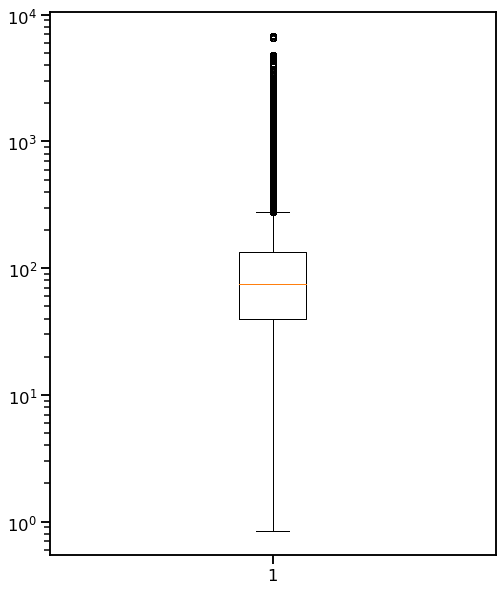

In [29]:
# boxplot des prix

fig, ax = plt.subplots(figsize=(8,10))
plt.boxplot(sel['price'])
plt.yscale('log')
plt.show()

# RFM

## Basket AVG

In [30]:
# Prix moyen de la commande (commande unique)

sum_order_by_cust = sel.groupby(['customer_unique_id', 'order_id'])['price'].sum()

In [31]:
basket_avg = sum_order_by_cust.groupby(['customer_unique_id']).mean()

## Most recent buy

In [32]:
sel.order_purchase_timestamp.dt.year.value_counts()

2018    9615682
2017    8120246
2016      63172
Name: order_purchase_timestamp, dtype: int64

In [33]:
# Transformation en datetime

sel.loc[:,'order_purchase_timestamp'] = pd.to_datetime(sel['order_purchase_timestamp'])

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [34]:
most_recent = sel.groupby('customer_unique_id')['order_purchase_timestamp'].max()

## Total amount by client

In [35]:
total_amount = sel.groupby('customer_unique_id')['price'].sum()

## Frequency

In [36]:
# méthode 1
no_duplicate = sel.drop_duplicates('order_id')
frequency = no_duplicate.groupby('customer_unique_id')['order_id'].count()
frequency.value_counts()

1     90989
2      2609
3       184
4        30
5         9
6         3
7         3
9         1
15        1
Name: order_id, dtype: int64

In [37]:
# Méthode 2 
frequency = sel.groupby('customer_unique_id')['order_id'].nunique()
frequency.value_counts()

1     90989
2      2609
3       184
4        30
5         9
6         3
7         3
9         1
15        1
Name: order_id, dtype: int64

In [38]:
frequency.value_counts() / len(frequency)

1     0.969732
2     0.027806
3     0.001961
4     0.000320
5     0.000096
6     0.000032
7     0.000032
9     0.000011
15    0.000011
Name: order_id, dtype: float64

## Review average

In [33]:
review_avg = sel.groupby('customer_unique_id')['review_score'].mean()
review_avg

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    5.0
0000b849f77a49e4a4ce2b2a4ca5be3f    4.0
0000f46a3911fa3c0805444483337064    3.0
0000f6ccb0745a6a4b88665a16c9f078    4.0
0004aac84e0df4da2b147fca70cf8255    5.0
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    5.0
fffea47cd6d3cc0a88bd621562a9d061    4.0
ffff371b4d645b6ecea244b27531430a    5.0
ffff5962728ec6157033ef9805bacc48    5.0
ffffd2657e2aad2907e67c3e9daecbeb    5.0
Name: review_score, Length: 93829, dtype: float64

# Category

In [34]:
# Exploration
temp = sel.set_index('customer_unique_id')

sel['product_category_name_english'].unique()

array(['office_furniture', 'auto', 'sports_leisure', 'baby', 'housewares',
       'bed_bath_table', 'toys', 'watches_gifts', 'health_beauty',
       'telephony', 'fashion_bags_accessories', 'home_appliances',
       'stationery', 'cool_stuff', 'garden_tools', 'furniture_decor',
       'construction_tools_construction', 'perfumery',
       'books_general_interest', 'furniture_living_room',
       'computers_accessories', 'electronics', 'pet_shop',
       'fashion_shoes', 'christmas_supplies', 'computers',
       'small_appliances', 'consoles_games',
       'kitchen_dining_laundry_garden_furniture', 'home_confort',
       'fixed_telephony', 'audio', 'fashion_male_clothing',
       'industry_commerce_and_business', 'music', 'cine_photo', 'food',
       'home_appliances_2', 'market_place', 'books_technical', 'drinks',
       'art', 'luggage_accessories', 'musical_instruments',
       'home_construction', 'flowers', 'food_drink', 'books_imported',
       'costruction_tools_garden', 'fashion

In [35]:
# Exploration

len(sel['product_category_name_english'].unique())

71

In [36]:
# Mappage des nouvelles catégories

technology = ['telephony', 'computers_accessories', 'electronics', 'computers', 'consoles_games',
                'fixed_telephony', 'dvds_blu_ray', 'tablets_printing_image', 'cine_photo']
audio_music = ['audio', 'music', 'musical_instruments', 'cds_dvds_musicals']
food = ['food', 'drinks', 'food_drink', 'la_cuisine']
fashion = ['fashion_childrens_clothes', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_male_clothing',
           'fashion_sport', 'fashio_female_clothing', 'fashion_underwear_beach']
office = ['office_furniture', 'stationery', 'furniture_decor']
home = ['housewares', 'bed_bath_table', 'furniture_living_room', 
        'kitchen_dining_laundry_garden_furniture', 'home_confort', 'furniture_bedroom', 'furniture_mattress_and_upholstery',
       'home_comfort_2']
auto = ['auto']
sport = ['sports_leisure']
children = ['baby', 'toys', 'fashion_childrens_clothes']
misc = ['cool_stuff', 'market_place']
garden = ['garden_tools', 'flowers', 'costruction_tools_garden']
construction = ['construction_tools_construction', 'home_construction', 'construction_tools_safety',
               'costruction_tools_tools', 'construction_tools_lights']
beauty_health = ['health_beauty', 'perfumery', 'diapers_and_hygiene']
gift = ['watches_gifts']
book = ['books_general_interest', 'books_technical', 'books_imported']
pet = ['pet_shop']
appliance = ['home_appliances', 'home_appliances_2', 'air_conditioning', 'small_appliances_home_oven_and_coffee',
            'small_appliances']
business = ['industry_commerce_and_business', 'agro_industry_and_commerce']
art = ['art', 'arts_and_craftmanship']
travel = ['luggage_accessories']
party = ['christmas_supplies', 'party_supplies']
security = ['security_and_services', 'signaling_and_security']

# Changement de nom

sel.loc[:,'cat'] = sel['product_category_name_english']

/Users/jeremy/opt/miniconda3/envs/jvds/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [38]:
# Création de listes pour la fonction

list_vars = [technology, audio_music, food, fashion, office, home, auto, sport, children, misc, garden, construction,
             beauty_health, gift, book, pet, appliance, business, art, travel, party, security]
list_names = ['technology', 'audio_music', 'food', 'fashion', 'office', 'home', 'auto', 'sport', 'children', 'misc',
              'garden', 'construction', 'beauty_health', 'gift', 'book', 'pet', 'appliance', 'business', 'art',
              'travel', 'party', 'security']

def CategoryReplacerSeries(to_replace=None, value=None, data=None):
    
    ### Remplace les anciennes catégories par les nouvelles ###
    
    for x in to_replace :
        data.replace(x, value, inplace=True) 

In [39]:
# Utilisation de la fonction

cat = sel.loc[:,'cat']
for y in range(len(list_vars)):
    CategoryReplacerSeries(to_replace=list_vars[y], value=list_names[y], data=cat)
    
sel.loc[:,'cat'] = cat

In [41]:
# Vérifications 

sel['cat'].unique()

In [43]:
# Vérifications

sel.groupby('cat')['product_id'].count()

cat
appliance         344297
art                38577
audio_music       166208
auto              608435
beauty_health    1993910
book              136969
business           77532
children         1164540
construction      341781
fashion           416653
food              180093
garden            742582
gift              893421
home             3344243
misc              636678
office           2105433
party              26477
pet               339648
security           33123
sport            1400037
technology       2623027
travel            185436
Name: product_id, dtype: int64

# Additional information

## Volume

In [46]:
volume = sel.groupby('customer_unique_id')['volume'].mean()

## Weight

In [47]:
weight = sel.groupby('customer_unique_id')['product_weight_g'].mean()

## Payment installment

In [48]:
payment_inst = sel.groupby('customer_unique_id')['payment_installments'].mean()

## Payment type (most common)

In [49]:
payment = sel.groupby('customer_unique_id')['payment_type'].agg(lambda x:x.value_counts().index[0])

## Delivery time

In [50]:
delivery = sel.groupby('customer_unique_id')['delivery_time'].mean()

## Freight value

In [51]:
freight = sel.groupby('customer_unique_id')['freight_value'].mean()

## Distance seller-customer

In [52]:
distance = sel.groupby('customer_unique_id')['same_state'].agg(lambda x:x.value_counts().index[0])

## Geolocation

In [54]:
lat = sel.groupby('customer_unique_id')['geolocation_lat'].agg(lambda x:x.value_counts().index[0])

In [55]:
long = sel.groupby('customer_unique_id')['geolocation_lng'].agg(lambda x:x.value_counts().index[0])

# Merge

In [56]:
temp1 = pd.merge(basket_avg, most_recent, left_on=basket_avg.index,
        right_on=most_recent.index)
temp1.head()

key_0     price order_purchase_timestamp
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42

In [57]:
temp2 = pd.merge(temp1, review_avg, left_on='key_0',
        right_on=review_avg.index)

In [58]:
temp3 = pd.merge(temp2, total_amount, left_on='key_0',
        right_on=total_amount.index)
temp3.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y  
0           5.0   8573.40  
1           4.0   2721.60  
2           3.0   8073.00  
3           4.0    831.68  
4           5.0  23940.00

In [59]:
temp4 = pd.merge(temp3, volume, left_on='key_0',
        right_on=volume.index)
temp4.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y   volume  
0           5.0   8573.40   7616.0  
1           4.0   2721.60   5148.0  
2           3.0   8073.00  43750.0  
3           4.0    831.68   1045.0  
4           5.0  23940.00    528.0

In [60]:
temp5 = pd.merge(temp4, payment, left_on='key_0',
        right_on=payment.index)
temp5.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y   volume payment_type  
0           5.0   8573.40   7616.0  credit_card  
1           4.0   2721.60   5148.0  credit_card  
2           3.0   8073.00  43750.0  credit_card  
3           4.0    831.68   1045.0  credit_card  
4           5.0  23940.00    528.0  credit_card

In [61]:
temp6 = pd.merge(temp5, delivery, left_on='key_0',
        right_on=payment.index)
temp6.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y   volume payment_type  delivery_time  
0           5.0   8573.40   7616.0  credit_card            6.0  
1           4.0   2721.60   5148.0  credit_card            3.0  
2           3.0   8073.00  43750.0  credit_card           25.0  
3           4.0    831.68   1045.0  credit_card           20.0  
4           5.0  23940.00    528.0  credit_card           13.0

In [62]:
temp7 = pd.merge(temp6, distance, left_on='key_0',
        right_on=distance.index)
temp7.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y   volume payment_type  delivery_time  same_state  
0           5.0   8573.40   7616.0  credit_card            6.0        True  
1           4.0   2721.60   5148.0  credit_card            3.0        True  
2           3.0   8073.00  43750.0  credit_card           25.0       False  
3           4.0    831.68   1045.0  credit_card           20.0       False  
4           5.0  23940.00    528.0  credit_card           13.0        True

In [63]:
temp8 = pd.merge(temp7, freight, left_on='key_0',
        right_on=freight.index)
temp8.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y   volume payment_type  delivery_time  same_state  \
0           5.0   8573.40   7616.0  credit_card            6.0        True   
1           4.0   2721.60   5148.0  credit_card            3.0        True   
2           3.0   8073.00  43750.0  credit_card           25.0       False   
3           4.0    831.68   1045.0  credit_card           20.0       False   
4           5.0  23940.00    528.0  credit_card           13.0        True   

   freight_value  
0          12.00  
1           8.29  
2          17.22  
3          17.63  
4          16.89

In [64]:
temp9 = pd.merge(temp8, weight, left_on='key_0',
        right_on=weight.index)
temp9.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y   volume payment_type  delivery_time  same_state  \
0           5.0   8573.40   7616.0  credit_card            6.0        True   
1           4.0   2721.60   5148.0  credit_card            3.0        True   
2           3.0   8073.00  43750.0  credit_card           25.0       False   
3           4.0    831.68   1045.0  credit_card           20.0       False   
4           5.0  23940.00    528.0  credit_card           13.0        True   

   freight_value  product_weight_g  
0          12.00            1500.0  
1           8.29             375.0  
2          17.22            1500.0  
3          17.63             150.0  
4          16.89            6050.0

In [65]:
temp10 = pd.merge(temp9, payment_inst, left_on='key_0',
        right_on=payment_inst.index)
temp10.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y   volume payment_type  delivery_time  same_state  \
0           5.0   8573.40   7616.0  credit_card            6.0        True   
1           4.0   2721.60   5148.0  credit_card            3.0        True   
2           3.0   8073.00  43750.0  credit_card           25.0       False   
3           4.0    831.68   1045.0  credit_card           20.0       False   
4           5.0  23940.00    528.0  credit_card           13.0        True   

   freight_value  product_weight_g  payment_installments  
0          12.00            1500.0                   8.0  
1           8.29             375.0                   1.0  
2          17.22            1500.0                   8.0  
3          17.63             150.0                   4.0  
4          16.89            6050.0                   6.0

In [66]:
temp11 = pd.merge(temp10, lat, left_on='key_0',
        right_on=lat.index)
temp11.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y   volume payment_type  delivery_time  same_state  \
0           5.0   8573.40   7616.0  credit_card            6.0        True   
1           4.0   2721.60   5148.0  credit_card            3.0        True   
2           3.0   8073.00  43750.0  credit_card           25.0       False   
3           4.0    831.68   1045.0  credit_card           20.0       False   
4           5.0  23940.00    528.0  credit_card           13.0        True   

   freight_value  product_weight_g  payment_installments  geolocation_lat  
0          12.00            1500.0                   8.0       -23.338572  
1           8.29             375.0                   1.0       -23.557203  
2          17.22            1500.0                   8.0       -27.543787  
3          17.63             150.0                   4.0        -1.308989  
4          16.89            6050.0                   6.0       -23.506751

In [67]:
temp12 = pd.merge(temp11, long, left_on='key_0',
        right_on=long.index)
temp12.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y   volume payment_type  delivery_time  same_state  \
0           5.0   8573.40   7616.0  credit_card            6.0        True   
1           4.0   2721.60   5148.0  credit_card            3.0        True   
2           3.0   8073.00  43750.0  credit_card           25.0       False   
3           4.0    831.68   1045.0  credit_card           20.0       False   
4           5.0  23940.00    528.0  credit_card           13.0        True   

   freight_value  product_weight_g  payment_installments  geolocation_lat  \
0          12.00            1500.0                   8.0       -23.338572   
1           8.29             375.0                   1.0       -23.557203   
2          17.22            1500.0                   8.0       -27.543787   
3          17.63             150.0                   4.0        -1.308989   
4          16.89            6050.0                   6.0       -23.506751   

   geolocation_lng  
0       -46.825206  
1       -46.782778  
2       -48.625680  
3       -48.486080  
4       -47.470592

In [68]:
temp13 = pd.merge(temp12, frequency, left_on='key_0',
        right_on=long.index)
temp13.head()

key_0   price_x order_purchase_timestamp  \
0  0000366f3b9a7992bf8c76cfdf3221e2   8573.40      2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f   2721.60      2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064   8073.00      2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078    831.68      2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255  23940.00      2017-11-14 19:45:42   

   review_score   price_y   volume payment_type  delivery_time  same_state  \
0           5.0   8573.40   7616.0  credit_card            6.0        True   
1           4.0   2721.60   5148.0  credit_card            3.0        True   
2           3.0   8073.00  43750.0  credit_card           25.0       False   
3           4.0    831.68   1045.0  credit_card           20.0       False   
4           5.0  23940.00    528.0  credit_card           13.0        True   

   freight_value  product_weight_g  payment_installments  geolocation_lat  \
0          12.00            1500.0                   8.0       -23.338572   
1           8.29             375.0                   1.0       -23.557203   
2          17.22            1500.0                   8.0       -27.543787   
3          17.63             150.0                   4.0        -1.308989   
4          16.89            6050.0                   6.0       -23.506751   

   geolocation_lng  order_id  
0       -46.825206         1  
1       -46.782778         1  
2       -48.625680         1  
3       -48.486080         1  
4       -47.470592         1

In [69]:
temp13.columns = ['customer_unique_id', 'basket_avg', 'last_purchase', 'avg_review_score', 'total_amount',
                  'avg_vol_pack', 'payment_type', 'avg_delivery_time', 'same_state', 'avg_freight_value',
                  'avg_weight', 'payment_installments', 'lat', 'long', 'frequency']

In [70]:
customer = pd.merge(temp13, sel[['customer_unique_id', 'cat']], left_on='customer_unique_id',
        right_on='customer_unique_id')
customer.head()

customer_unique_id  basket_avg       last_purchase  \
0  0000366f3b9a7992bf8c76cfdf3221e2      8573.4 2018-05-10 10:56:27   
1  0000366f3b9a7992bf8c76cfdf3221e2      8573.4 2018-05-10 10:56:27   
2  0000366f3b9a7992bf8c76cfdf3221e2      8573.4 2018-05-10 10:56:27   
3  0000366f3b9a7992bf8c76cfdf3221e2      8573.4 2018-05-10 10:56:27   
4  0000366f3b9a7992bf8c76cfdf3221e2      8573.4 2018-05-10 10:56:27   

   avg_review_score  total_amount  avg_vol_pack payment_type  \
0               5.0        8573.4        7616.0  credit_card   
1               5.0        8573.4        7616.0  credit_card   
2               5.0        8573.4        7616.0  credit_card   
3               5.0        8573.4        7616.0  credit_card   
4               5.0        8573.4        7616.0  credit_card   

   avg_delivery_time  same_state  avg_freight_value  avg_weight  \
0                6.0        True               12.0      1500.0   
1                6.0        True               12.0      1500.0   
2                6.0        True               12.0      1500.0   
3                6.0        True               12.0      1500.0   
4                6.0        True               12.0      1500.0   

   payment_installments        lat       long  frequency   cat  
0                   8.0 -23.338572 -46.825206          1  home  
1                   8.0 -23.338572 -46.825206          1  home  
2                   8.0 -23.338572 -46.825206          1  home  
3                   8.0 -23.338572 -46.825206          1  home  
4                   8.0 -23.338572 -46.825206          1  home

In [72]:
customer = customer.set_index('customer_unique_id')

In [73]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17799100 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 15 columns):
 #   Column                Dtype         
---  ------                -----         
 0   basket_avg            float64       
 1   last_purchase         datetime64[ns]
 2   avg_review_score      float64       
 3   total_amount          float64       
 4   avg_vol_pack          float64       
 5   payment_type          object        
 6   avg_delivery_time     float64       
 7   same_state            bool          
 8   avg_freight_value     float64       
 9   avg_weight            float64       
 10  payment_installments  float64       
 11  lat                   float64       
 12  long                  float64       
 13  frequency             int64         
 14  cat                   object        
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 2.0+ GB


## Last_purchase

In [74]:
customer.last_purchase.max()

Timestamp('2018-09-03 09:06:57')

In [75]:
days = customer.last_purchase.max() - customer.last_purchase
days = days.dt.days

customer['last_purchase'] = days

In [79]:
customer = customer.drop_duplicates()

# Exploration

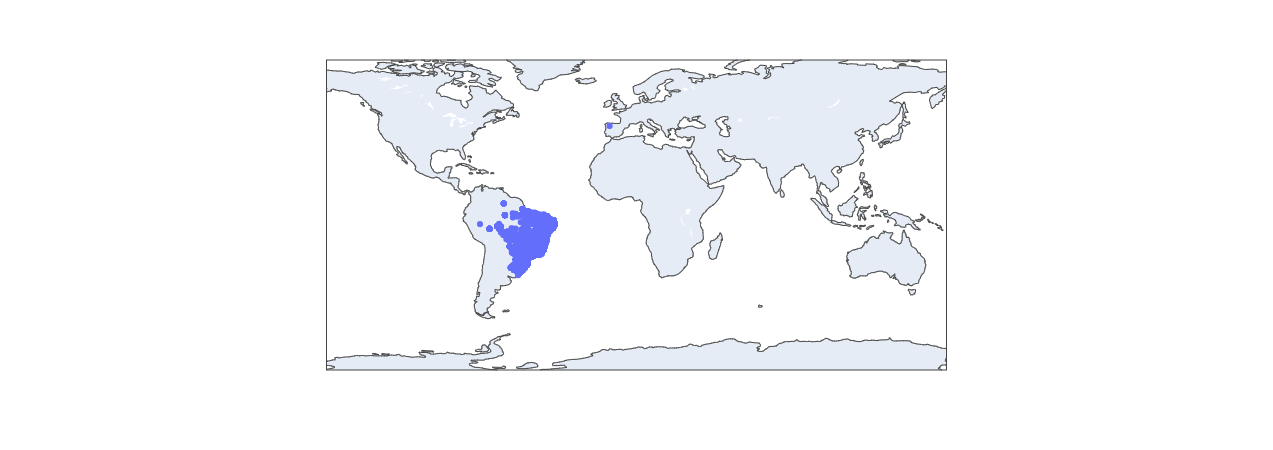

In [80]:
# Visualisation d'un échantillon de 15 000 observations

sample = customer.sample(15000, random_state= 42)

fig = px.scatter_geo(sample,
                     lat=sample.lat,
                     lon=sample.long)
fig.show()

## Correlations

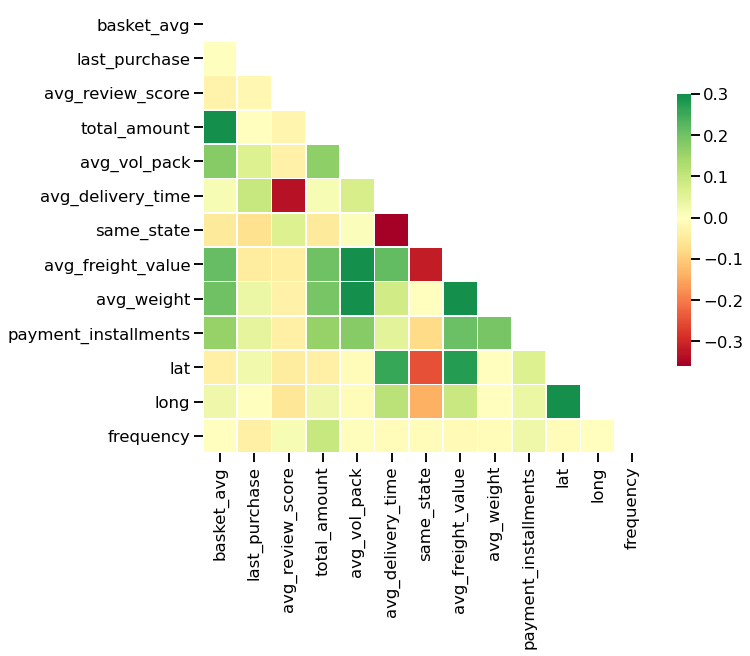

In [81]:
# Heatmap des corrélations entre les variables

fig, ax = plt.subplots(figsize=(10,10))

corr = customer.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap='RdYlGn'

ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

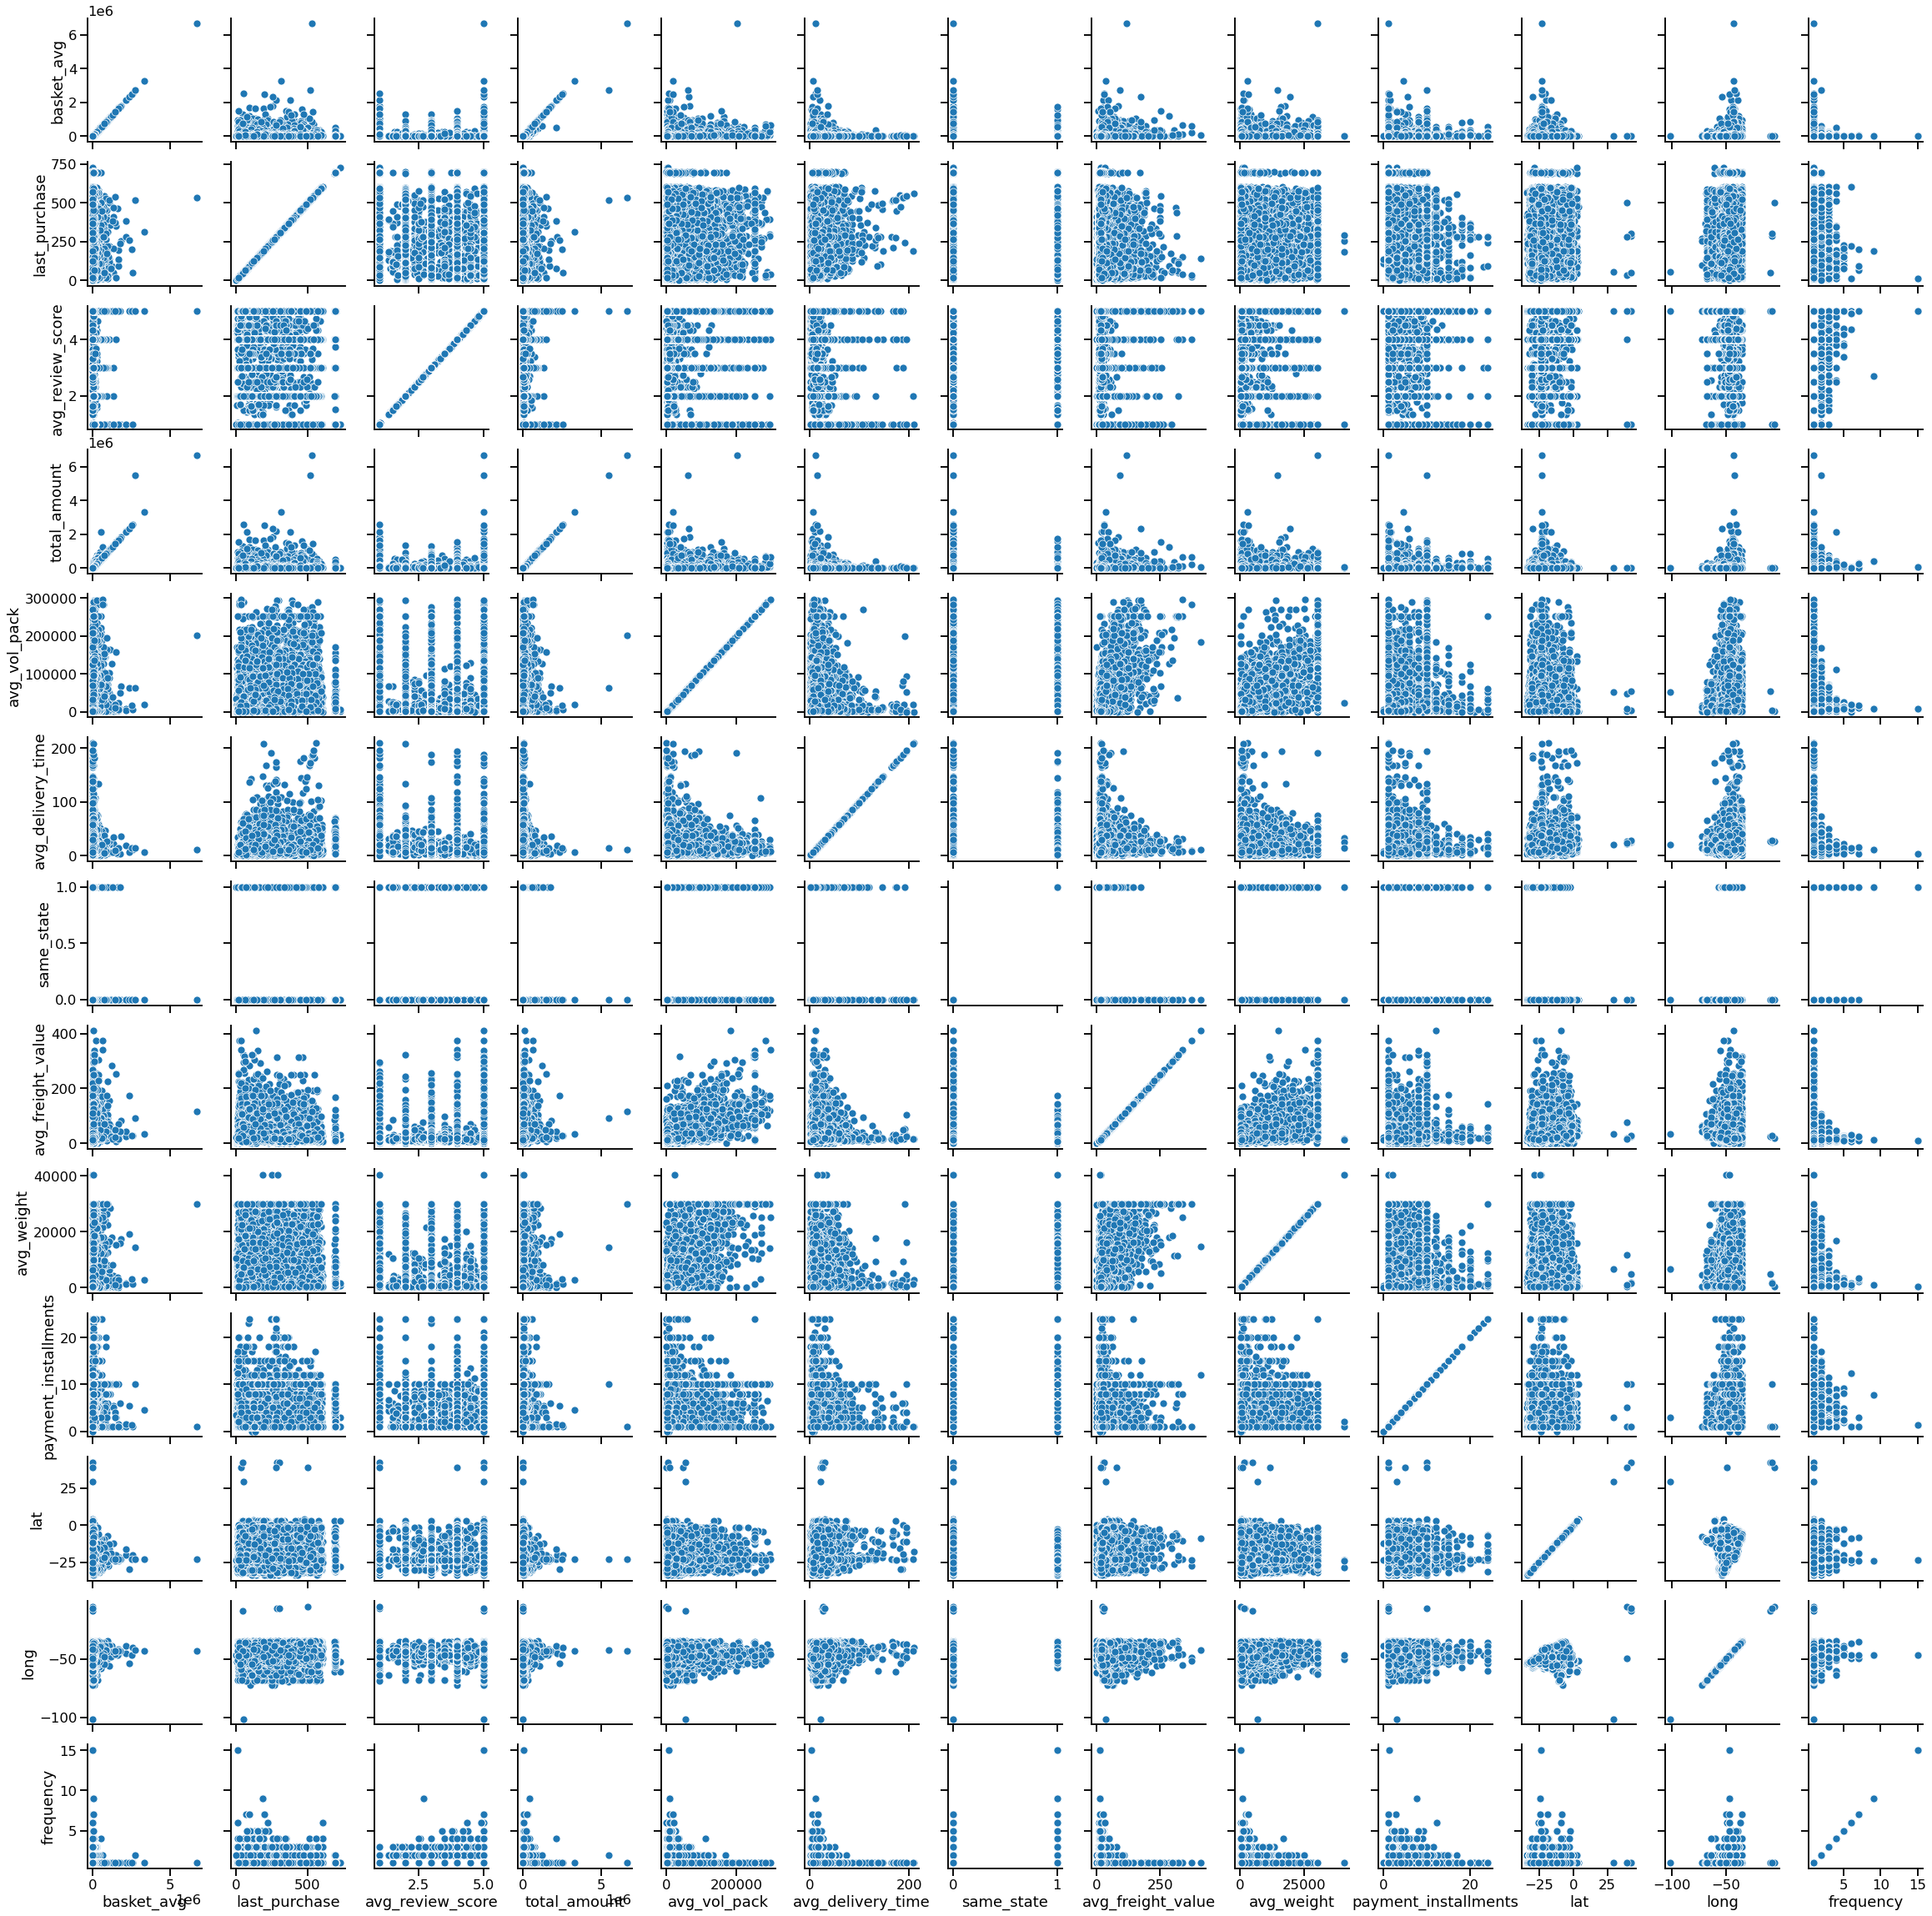

In [82]:
g = sns.PairGrid(customer)
g.map(sns.scatterplot)

## Preparation

In [84]:
customer['same_state'] = customer.same_state.astype('category')

In [86]:
customer = customer.dropna()

In [87]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93894 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   basket_avg            93894 non-null  float64 
 1   last_purchase         93894 non-null  int64   
 2   avg_review_score      93894 non-null  float64 
 3   total_amount          93894 non-null  float64 
 4   avg_vol_pack          93894 non-null  float64 
 5   payment_type          93894 non-null  object  
 6   avg_delivery_time     93894 non-null  float64 
 7   same_state            93894 non-null  category
 8   avg_freight_value     93894 non-null  float64 
 9   avg_weight            93894 non-null  float64 
 10  payment_installments  93894 non-null  float64 
 11  lat                   93894 non-null  float64 
 12  long                  93894 non-null  float64 
 13  frequency             93894 non-null  int64   
 14  c

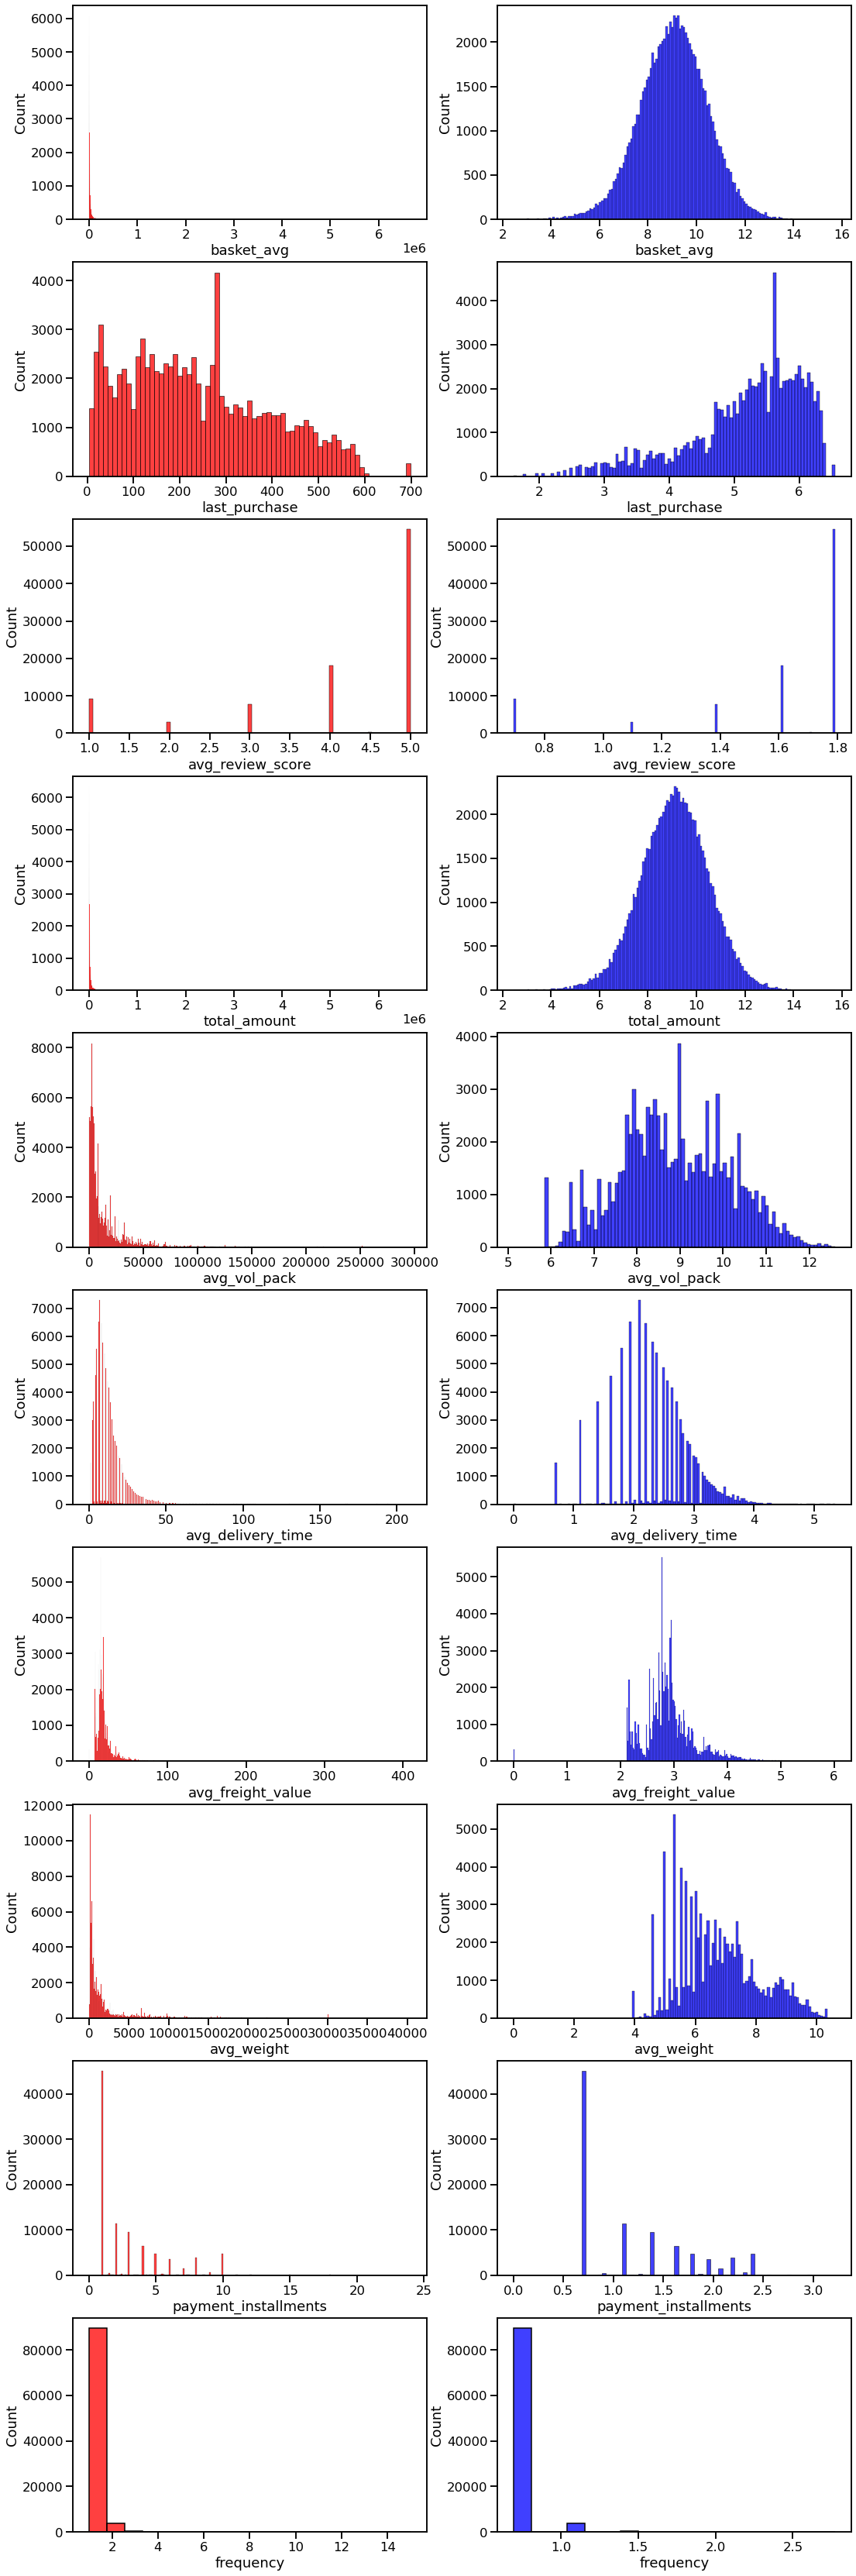

In [98]:
# Histogramme des variables numériques avec et sans transformation en log x+1

num = list(customer.select_dtypes(['float', 'int']).columns)
cat = list(customer.select_dtypes(['object', 'category']).columns)

num.remove('lat')
num.remove('long')

temp = np.log1p(customer[num])

length = len(num)

fig, ax = plt.subplots(length,2, figsize=(18,length*6))

for x in range(0, length*2):
    if x < length:
        sns.histplot(data=customer, x=num[x], ax=ax[x ,0], color='red')
    else :
        sns.histplot(data=temp, x=num[x-length ], ax=ax[x-length, 1], color='blue')
        
plt.show()

# Export

In [93]:
# Export des données vers un fichier CSV
customer.to_csv('customer.csv')